In [1]:
#Commenct Toxicity Model : To identify the type of toxicity expression in the comments. 
# Data : Kaggle : https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/overview

In [37]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.layers import TextVectorization, Dropout, LSTM, Bidirectional, Dense, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [3]:
df=pd.read_csv(r'C:\Users\ragha\Documents\Python Scripts\files\jigsaw-toxic-comment-classification-challenge\train.csv')

In [4]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [5]:
df.iloc[2]['comment_text']

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [6]:
df[df.columns[2:]]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [7]:
x=df['comment_text']
y=df[df.columns[2:]].values

In [8]:
x,y

(0         Explanation\nWhy the edits made under my usern...
 1         D'aww! He matches this background colour I'm s...
 2         Hey man, I'm really not trying to edit war. It...
 3         "\nMore\nI can't make any real suggestions on ...
 4         You, sir, are my hero. Any chance you remember...
                                 ...                        
 159566    ":::::And for the second time of asking, when ...
 159567    You should be ashamed of yourself \n\nThat is ...
 159568    Spitzer \n\nUmm, theres no actual article for ...
 159569    And it looks like it was actually you who put ...
 159570    "\nAnd ... I really don't think you understand...
 Name: comment_text, Length: 159571, dtype: object,
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [9]:
max_words=200000

In [10]:
vectorizer=TextVectorization(max_tokens=max_words,output_sequence_length=1800,output_mode='int')

In [11]:
vectorizer.adapt(x.values)

In [12]:
vectorized_text=vectorizer(x.values)

In [13]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  643,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2506, ...,     0,     0,     0],
       [  425,   440,    70, ...,     0,     0,     0],
       ...,
       [32141,  7329,   383, ...,     0,     0,     0],
       [    5,    12,   533, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [14]:
dataset=tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset=dataset.cache()
dataset=dataset.shuffle(160000)
dataset=dataset.batch(16)
dataset=dataset.prefetch(8)

In [15]:
batch_x,batch_y=dataset.as_numpy_iterator().next()

In [16]:
batch_x

array([[ 32,   2, 108, ...,   0,   0,   0],
       [ 41,   9,  49, ...,   0,   0,   0],
       [918,  37,   8, ...,   0,   0,   0],
       ...,
       [  5, 144,  10, ...,   0,   0,   0],
       [  7, 729,  19, ...,   0,   0,   0],
       [ 62,   4,  56, ...,   0,   0,   0]], dtype=int64)

In [17]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [18]:
#train 70% Validation - 20% Test- 10%
train=dataset.take(int(len(dataset)*.7))
val=dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test=dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [19]:
len(train),len(val),len(test)

(6981, 1994, 997)

In [20]:
#The above is batches of each size 16

In [21]:
train_generator=train.as_numpy_iterator()

In [22]:
train_generator.next()

(array([[ 1935,  7212,     9, ...,     0,     0,     0],
        [    7,    67,  1990, ...,     0,     0,     0],
        [  311,     8,    88, ...,     0,     0,     0],
        ...,
        [  201,   969, 46218, ...,     0,     0,     0],
        [   47,     7,   167, ...,     0,     0,     0],
        [73019,  1112, 26976, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [23]:
model=Sequential()
model.add(Embedding(max_words+1,32))
model.add(Bidirectional(LSTM(32,activation='tanh'))) #TanH as dictated by Tf
model.add(Dense(128,activation='elu'))
model.add(Dense(256,activation='elu'))
model.add(Dense(128,activation='elu'))
model.add(Dense(6,activation='sigmoid'))

In [27]:
model.compile(loss='BinaryCrossentropy', optimizer='adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [29]:
history=model.fit(train,epochs=1,validation_data=val)

6981/6981 [==============================] - 2184s 312ms/step - loss: 0.0624 - val_loss: 0.0452


In [32]:
import matplotlib.pyplot as plt

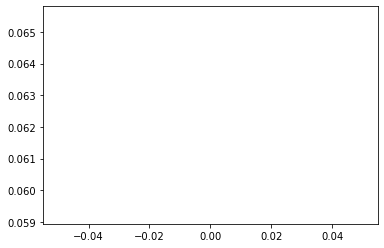

In [45]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['loss'], label='val_loss')

# Because 1 eoch was trained no graph.

In [30]:
#Testing the model

In [34]:
batch=test.as_numpy_iterator().next()
batchx,batchy=test.as_numpy_iterator().next()

In [35]:
(model.predict(batchx)>0.5).astype('int')

1/1 [==============================] - 1s 634ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [38]:
pre=Precision()
re=Recall()
acc=CategoricalAccuracy()

In [40]:
for batch in test.as_numpy_iterator():
    xtrue,ytrue=batch
    yhat=model.predict(xtrue)
    
    ytrue=ytrue.flatten()
    yhat=yhat.flatten()
    
    pre.update_state(ytrue,yhat)
    re.update_state(ytrue,yhat)
    acc.update_state(ytrue,yhat)


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 62ms/step


In [41]:
print('Precision:',pre.result().numpy())
print('Recall:',re.result().numpy())
print('Accuracy:',acc.result().numpy())

Precision: 0.8861386
Recall: 0.58288926
Accuracy: 0.49648947
